In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

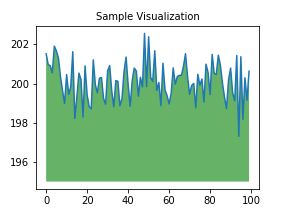

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


**What is COVID-19?**
Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1 'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`


In [ ]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [ ]:
# loading data right from the source:
death_df = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('/content/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

In [ ]:
confirmed_df.head()
recovered_df.head()
death_df.head()
country_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [ ]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
#country_df.head()

In [ ]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['total_confirmed'].sum())
deaths_total = int(country_df['total_deaths'].sum())
recovered_total = int(country_df['total_recovered'].sum())
active_total = int(country_df['active_cases'].sum())

In [ ]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [ ]:
# sorting the values by confirmed descednding order
# country_df.sort_values('total_confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g

    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('total_confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
sorted_country_df = country_df.sort_values('total_confirmed', ascending= False)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
 # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="total_confirmed", size="total_confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="total_Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

def plot_cases_of_a_country(country):
    labels = ['tota_confirmed', 'total_deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]

    df_list = [confirmed_df, death_df]

    fig = go.Figure();

    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)

        else:
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)

        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));

    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,

    );

    fig.update_yaxes(type="linear")
    fig.show();


In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "total_confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"],
    height=500,
    width=800
)

In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "total_deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"],
    height=500,
    width=800
)

In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "total_recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"],
    height=500,
    width=800
)

In [ ]:
confirmed_df.isnull().sum()

,0
state,198
country,0
lat,2
long,2
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
1/27/20,0


In [ ]:
confirmed_df[confirmed_df.isnull().any(axis=1)]

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
confirmed_df = confirmed_df.dropna()

In [ ]:



world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map
